In [1]:
import numpy as np 
import pandas as pd
import os, json
from gensim.models import word2vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


gensim-ით დატრენინგებული მოდელების წაკითხვა

In [2]:
model_names = ['w2vemb100wind3.model','w2vemb100wind4.model',
              'w2vemb128wind3.model', 'w2vemb128wind4.model']
models = {}
for model_name in model_names:
    model_path = os.path.join('../resources/word2vec/', model_name)
    model = word2vec.Word2Vec.load(model_path)
    models[model_name] = model
    

In [3]:
def similarity(model, w1, w2):
    w1 = w1.lower()
    w2 = w2.lower()
    return model.wv.similarity(w1, w2)

def most_similar(model, word, n_words=5):
    word = word.lower()
    return model.wv.most_similar(word)[:n_words]

def analogy(model, x1, x2, y1):
    x1 = x1.lower()
    x2 = x2.lower()
    y1 = y1.lower()
    result = model.wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]


In [4]:
def eval_most_similar(word, models):
    print('most similar words for word', word)
    for model_name, model in models.items():
        print('model name', model_name)
        print(most_similar(model, word))
        
def eval_similarity(word1, word2, models):
    print('similarity between words:', word1, 'and', word2)
    for model_name, model in models.items():
        print('model name', model_name)
        print('similarity score', similarity(model, word1, word2))
    
def eval_analogies(x1, x2, y1, models):
    print(x1, '<-->', x2)
    print(y1, '<-->', '?')
    for model_name, model in models.items():
        print('model_name', model_name)
        print(analogy(model, x1, x2, y1))

In [5]:
eval_most_similar('ეკლესია', models)

most similar words for word ეკლესია
model name w2vemb100wind3.model
[('ტაძარი', 0.8583544492721558), ('ეკლესიაც', 0.8253511190414429), ('ეკელსია', 0.8138865828514099), ('ყველაწმინდის', 0.7937350273132324), ('ეკლესიები', 0.7935410737991333)]
model name w2vemb100wind4.model
[('ეკელსია', 0.8450406789779663), ('ტაძარი', 0.8431476950645447), ('ეკლესიაც', 0.8254337310791016), ('ყველაწმინდის', 0.8238847255706787), ('სამლოცველო', 0.8133891820907593)]
model name w2vemb128wind3.model
[('ტაძარი', 0.8326042890548706), ('ეკლესიაც', 0.803955078125), ('ეკელსია', 0.8028874397277832), ('სამლოცველო', 0.7636417150497437), ('ეკლესიები', 0.7586513757705688)]
model name w2vemb128wind4.model
[('ტაძარი', 0.8437527418136597), ('ეკელსია', 0.8098087310791016), ('ეკლესიაც', 0.8019223213195801), ('ყველაწმინდის', 0.7890192270278931), ('ეკლესიები', 0.7725778818130493)]


In [6]:
eval_most_similar('კატა', models)

most similar words for word კატა
model name w2vemb100wind3.model
[('მგელი', 0.815251350402832), ('მელა', 0.814049482345581), ('სამურავი', 0.8129146099090576), ('კურდღელი', 0.8111729621887207), ('თაგვი', 0.7885494828224182)]
model name w2vemb100wind4.model
[('კურდღელი', 0.8191514015197754), ('სამურავი', 0.8131676912307739), ('გომბეშო', 0.8048181533813477), ('ლეოპარდი', 0.8047611713409424), ('ყვავი', 0.8033595085144043)]
model name w2vemb128wind3.model
[('კურდღელი', 0.805199921131134), ('ლეოპარდი', 0.7873542308807373), ('მგელი', 0.7714686989784241), ('სამურავი', 0.7645623683929443), ('თაგვი', 0.7641733884811401)]
model name w2vemb128wind4.model
[('კურდღელი', 0.8023569583892822), ('მელა', 0.7926850318908691), ('სამურავი', 0.7804392576217651), ('მგელი', 0.7719718813896179), ('თაგვი', 0.764232337474823)]


In [7]:
eval_analogies('გოგო', 'ბიჭი', 'ქალი', models)

გოგო <--> ბიჭი
ქალი <--> ?
model_name w2vemb100wind3.model
მამაკაცი
model_name w2vemb100wind4.model
მამაკაცი
model_name w2vemb128wind3.model
მამაკაცი
model_name w2vemb128wind4.model
მამაკაცი


In [8]:
eval_similarity('მწერი', 'ბუზი', models)

similarity between words: მწერი and ბუზი
model name w2vemb100wind3.model
similarity score 0.7977623
model name w2vemb100wind4.model
similarity score 0.7670016
model name w2vemb128wind3.model
similarity score 0.7921775
model name w2vemb128wind4.model
similarity score 0.78778785


In [9]:
def display_pca_scatterplot(model, words, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)


როგორც ვხედავთ, საკმაოდ კარგად დაჯგუფდა მსგავსი დატვირთვის მქონე ზედსართავი სახელები

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


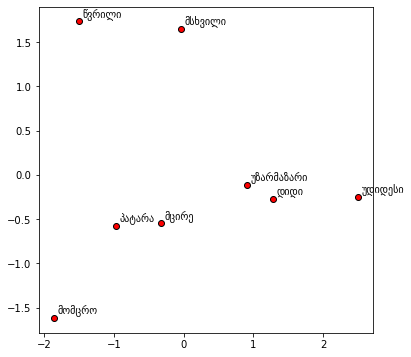

In [10]:
words = ['დიდი', 'უზარმაზარი', 'უდიდესი', 'მსხვილი', 'წვრილი', 'მცირე', 'პატარა', 'მომცრო']
model = models['w2vemb100wind3.model']
display_pca_scatterplot(model, words)


In [11]:
def display_closestwords(model, word, embed_size):
    
    arr = np.empty((0,embed_size), dtype='f')
    word_labels = [word]

    # მსგავსი სიტყვები
    close_words = model.wv.similar_by_word(word)
    
    # ყველა ვექტორის გაერთიანება არაიში
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # TSNE 2 განზომილებისთვის
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()


ქვემოთ ვხედავთ მსგავსი სიტყვების ფლოთს. ამ კონკრეტულ შემთხვევაში აღსანიშნავია, რომ ყველა ახლო სიტყვა არის ზმნა და ატარებს მსგავს დატვირთვას. 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


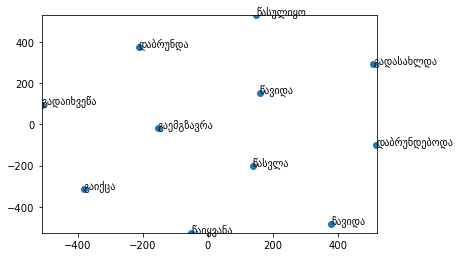

In [12]:
display_closestwords(model, 'წავიდა', 100)


შევაფასოთ ტრანსფორმერის მიერ შექმნილი ემბედინგებიც

In [13]:
import torch, math
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer


class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

class TransformerModel(nn.Module):

    def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.5, weights=None):
        super(TransformerModel, self).__init__()
        self.pos_encoder = PositionalEncoding(ninp, dropout)
        encoder_layers = TransformerEncoderLayer(ninp, nhead, nhid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        if weights is None:
            self.encoder = nn.Embedding(ntoken, ninp)        
        else:
            self.encoder = nn.Embedding.from_pretrained(weights)
        self.ninp = ninp
        self.decoder = nn.Linear(ninp, ntoken)

        self.init_weights()

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src, src_mask):
        src = self.encoder(src) * math.sqrt(self.ninp)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output

    
ntokens = 90001 # vocab-ის ზომა
emsize = 100 # ემბედინგის განზომილება
nhid = 200 # ენკოდერში ფიდფორვარდ ნეთვორქის ჰიდენ სთეითის განზომილება
nlayers = 2 # ენკოდერ ლეიერების რაოდენობა
nhead = 2 # attention-ების რაოდენობა
dropout = 0.3 # დროფაუთი
transformer = TransformerModel(ntokens, emsize, nhead, nhid, nlayers, dropout)
transformer.load_state_dict(torch.load('../resources/pytorch-transformer-model/best_model.pth', map_location=torch.device('cpu')))


<All keys matched successfully>

In [14]:
import json

with open('../data/vocab/vocab.json', 'r') as f:
    vocab = json.load(f)

word2id = {word:ind for ind, word in enumerate(vocab)}
embeddings = transformer.encoder.weight.data

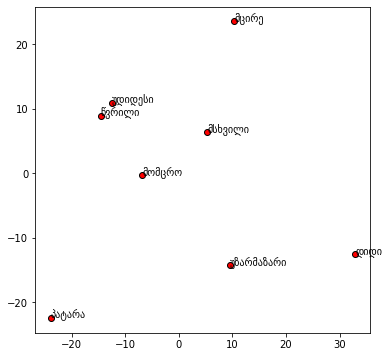

In [15]:
words = ['დიდი', 'უზარმაზარი', 'უდიდესი', 'მსხვილი', 'წვრილი', 'მცირე', 'პატარა', 'მომცრო']
word_ids = [word2id[word] for word in words]
word_vectors = np.array([np.array(embeddings[ind]) for ind in word_ids])    
twodim = PCA().fit_transform(word_vectors)[:,:2]

plt.figure(figsize=(6,6))
plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
for word, (x,y) in zip(words, twodim):
    plt.text(x+0.05, y+0.05, word)
